# Importing the Dataset

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df_311calls=pd.read_csv('/content/311_Service_Requests.csv')
df_311calls.columns = df_311calls.columns.str.strip()
df_311calls.head()

<ipython-input-2-3474cc85883d>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_311calls=pd.read_csv('/content/311_Service_Requests.csv')


,Case Reference,Open Date,Closed Date,Status,Subject,Reason,Type,Object Type,Address Number,Address Line 1,...,Neighborhood,X Coordinate,Y Coordinate,2010 Census Tract,2010 Census Block Group,2010 Census Block,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
0,1001911955,08/24/2023 01:54:00 PM,08/31/2023 07:02:00 AM,Closed,Dept of Public Works,Sanitation,Missed Pickup 2_Piece Large Trash (Req_Serv),Property,241,LA SALLE,...,University Heights,-8.774363e+06,5.303664e+06,UNKNOWN,UNKNOWN,UNKNOWN,004701,36029004701,360290047011,360290047011002
1,1001900925,07/18/2023 02:04:00 PM,07/20/2023 10:57:00 AM,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,325,NIAGARA,...,Lower West Side,-8.781338e+06,5.295739e+06,UNKNOWN,UNKNOWN,UNKNOWN,007102,36029007102,360290071023,360290071023006
2,1001804417,03/06/2023 10:47:00 AM,03/15/2023 08:38:00 AM,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,201,BARNARD,...,Kaisertown,-8.772600e+06,5.292288e+06,19,3,3000,001900,36029001900,360290019003,360290019003000
3,523945-1001902298,07/21/2023 10:30:00 PM,07/24/2023 11:29:00 AM,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Property,257,FRANKLIN,...,Central,-7.887462e+01,4.289115e+01,UNKNOWN,UNKNOWN,UNKNOWN,016500,36029016500,360290165002,360290165002006
4,518978-1001851078,05/13/2023 11:30:00 AM,05/15/2023 11:29:00 AM,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Property,82,BLOOMFIELD,...,South Park,-7.882044e+01,4.284529e+01,UNKNOWN,UNKNOWN,UNKNOWN,000800,36029000800,360290008001,360290008001002


# Determining the Categorical Variables

Based on the following code, Status and Object Type are the easiest to be described by a limited number of categories. The others cannot be easily described by a limited number of categories because there are many different possible values for them.

In [3]:
df_311calls["Status"].unique()

array(['Closed', 'Open'], dtype=object)

In [4]:
df_311calls["Subject"].unique()

array(['Dept of Public Works', 'DPIS', 'Utilities',
       'Buffalo Police Department', 'Dept of Parking', 'Dept of Law',
       'Buffalo Fire Department', 'Buffalo Municipal Housing Authority',
       'Office of the Mayor', 'Office of Strategic Planning',
       'Assessment & Taxation', 'City Clerk',
       'Community Services & Rec. Program.', 'Human Resources',
       'Knowledge Management', 'Management Information Systems', 'Test',
       'New Americans'], dtype=object)

In [5]:
df_311calls["Reason"].unique()

array(['Sanitation', 'Housing', 'National Grid', 'Police',
       'Engineering - Traffic', 'Engineering - Street Repairs',
       'Forestry', 'Moving Violations', 'Freedom of Information',
       'Rodent_Pest Control', 'Buffalo Water Authority', 'Streets',
       'Parking Violations Bureau', 'Buffalo Sewer Authority',
       'City Parks', 'BFD', 'BMHA', 'Animal Shelter',
       'Citizen Services - Quick Response Teams', 'Streets/Sanitation',
       'Citizen Services - Graffiti', 'Real Estate', 'OSP',
       'Citizens Services - Clean City', 'Assessment', 'Personnel',
       'Taxation', 'Administration', 'Buildings Division',
       'Adjudication - Ordinance Violation', 'City Clerk Issue',
       'Citizen Services - Save Our Streets', 'Harbor Master',
       'Citizen Services - Good Neighbor', 'Youth Bureau',
       'Community Based Orgs', 'Licenses', 'Rodent Control',
       'Fair Housing', 'HR', 'Knowledge', 'COB APP Issues',
       'Assessment & Taxation', 'Telecommunications', 'Test

In [6]:
df_311calls["Type"].unique()

array(['Missed Pickup 2_Piece Large Trash (Req_Serv)',
       'Housing Violations (Req_Serv)', 'Streetlights (Req_Serv)',
       'Police Issue (Req_Serv)', 'Sign Hazards (Req_Serv)',
       'Pick and Pay (Req_Serv)', 'Pot Hole (Req_Serv)',
       'Open311 Housing', 'Fallen Tree Blocking RoW (Req_Serv)',
       'Buffalo Traffic Violations (Req_Serv)',
       'Trash Ordinance Violation (Req_Serv)',
       'Signal Out or Flashing (Req_Serv)',
       'FOIL Records Police Dept (Req_Serv)',
       'Recycling Tote Replace (Req_Serv)', 'Rodents (Req_Serv)',
       'Water Issue (Req_Serv)', 'Street Snow Plowing (Req_Serv)',
       'Street Salting (Req_Serv)', 'Totes Deliver (Req_Serv)',
       'Garbage Missed Pick Up (Req_Serv)',
       'Leaves / Lawn Debris (Req_Serv)', 'Sweeper (Req_Serv)',
       'Totes Replace (Req_Serv)', 'Parking Issues (Req_Serv)',
       'Sign Maintenance (Req_Serv)',
       'FOIL Records Compensation and Benefits (Req_Serv)',
       'Sewer (Req_Serv)', 'FOIL Records ED

In [7]:
df_311calls["Object Type"].unique()

array(['Property', 'Unknown', 'Street', 'Organisation', 'Individual', nan],
      dtype=object)

# How the Categorical Variables are related to Council District, Police District, and Neighborhood

In [20]:
df_311calls["Neighborhood"].unique()

array(['University Heights', 'Lower West Side', 'Kaisertown', 'Central',
       'South Park', 'Broadway Fillmore', 'Lovejoy', 'Schiller Park',
       'Hamlin Park', 'MLK Park', 'Black Rock', 'Grant-Amherst',
       'Genesee-Moselle', 'Masten Park', 'UNKNOWN', 'Delavan Grider',
       'Elmwood Bidwell', 'West Hertel', 'Pratt-Willert',
       'Kensington-Bailey', 'North Park', 'Hopkins-Tifft', 'Parkside',
       'First Ward', 'Allentown', 'Riverside', 'Central Park',
       'Elmwood Bryant', 'Upper West Side', 'Fillmore-Leroy',
       'Seneca-Cazenovia', 'Fruit Belt', 'Kenfield', 'West Side',
       'Seneca Babcock', 'Ellicott', nan], dtype=object)

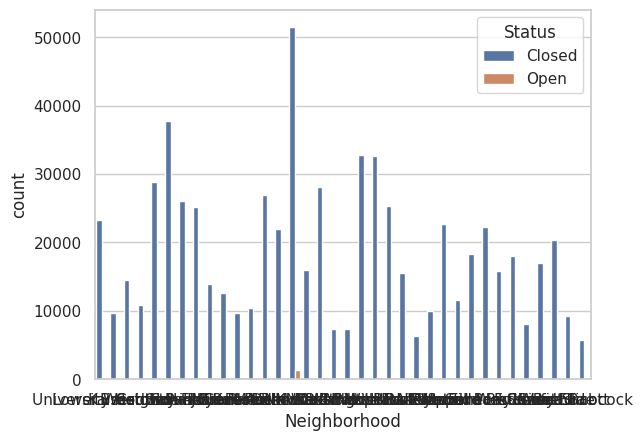

In [15]:
ax = sns.countplot(x="Neighborhood", hue="Status", data=df_311calls)

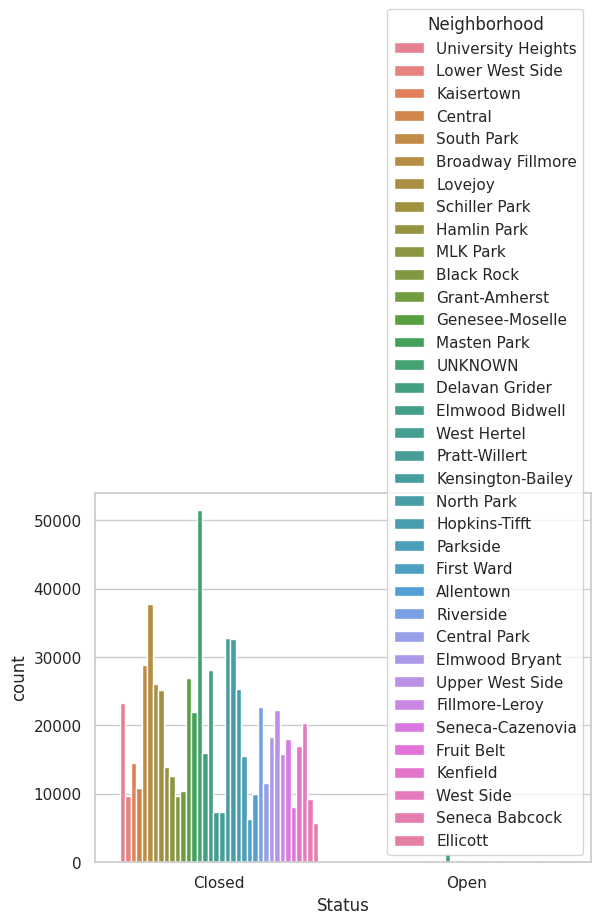

In [14]:
ax = sns.countplot(x="Status", hue="Neighborhood", data=df_311calls)

The different neighborhoods definitely vary in number of 311 reports. Excluding the unknown entries, Broadway Fillmore has the highest number of reports, while First Ward has the lowest.

In [16]:
df_311calls["Council District"].unique()

array(['UNIVERSITY', 'FILLMORE', 'LOVEJOY', 'ELLICOTT', 'SOUTH', 'MASTEN',
       'NORTH', 'UNKNOWN', 'DELAWARE', 'NIAGARA', 'UnAssigned', nan],
      dtype=object)

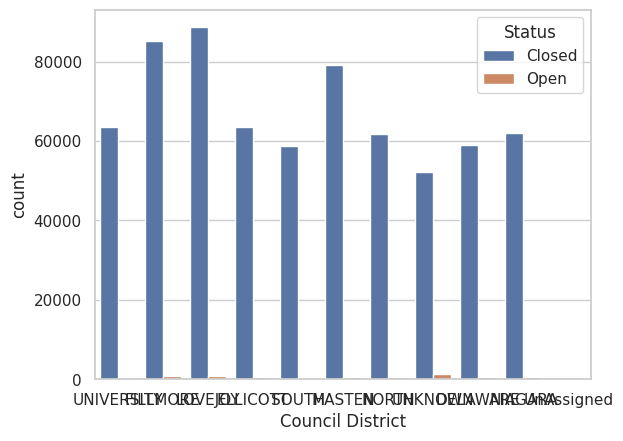

In [18]:
ax = sns.countplot(x="Council District", hue="Status", data=df_311calls)

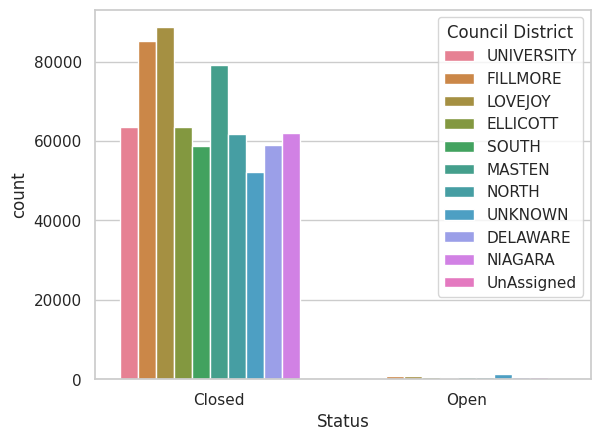

In [19]:
ax = sns.countplot(x="Status", hue="Council District", data=df_311calls)

The different Council Districts vary in number of 311 reports, but not as drastically as neighborhoods. Excluding the unknown entries, Lovejoy and Fillmore have the highest number of reports, while South has the lowest.

In [17]:
df_311calls["Police District"].unique()

array(['District E', 'District B', 'District A', 'District C',
       'District D', 'UNKNOWN', nan], dtype=object)

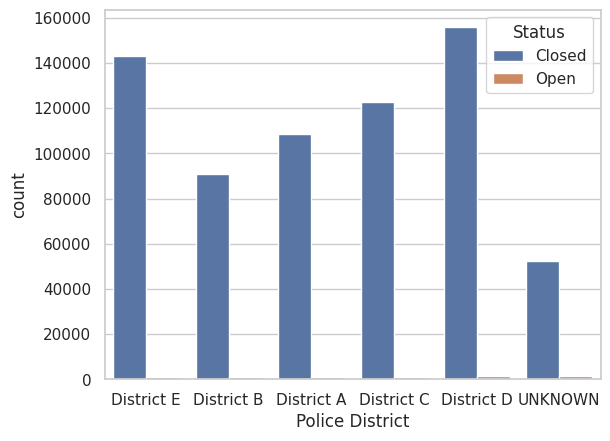

In [21]:
ax = sns.countplot(x="Police District", hue="Status", data=df_311calls)

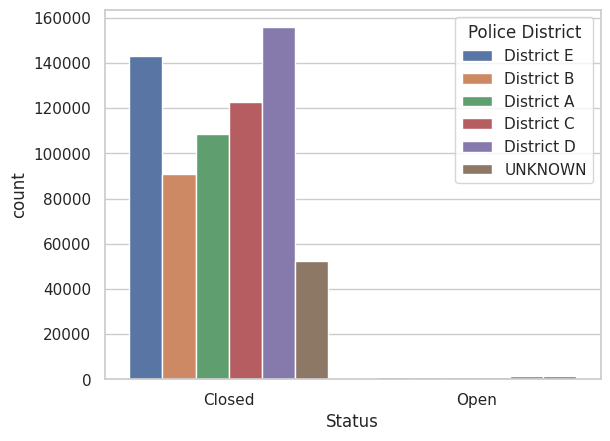

In [22]:
ax = sns.countplot(x="Status", hue="Police District", data=df_311calls)

The different Police Districts slightly vary in number of 311 reports. Excluding the unknown entries, District D and E have the highest number of reports, while District B has the lowest.

Status is not a good categorical variable to use in this dataset because the overwhelming majority of reports are closed. It is difficult to even notice any open reports.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


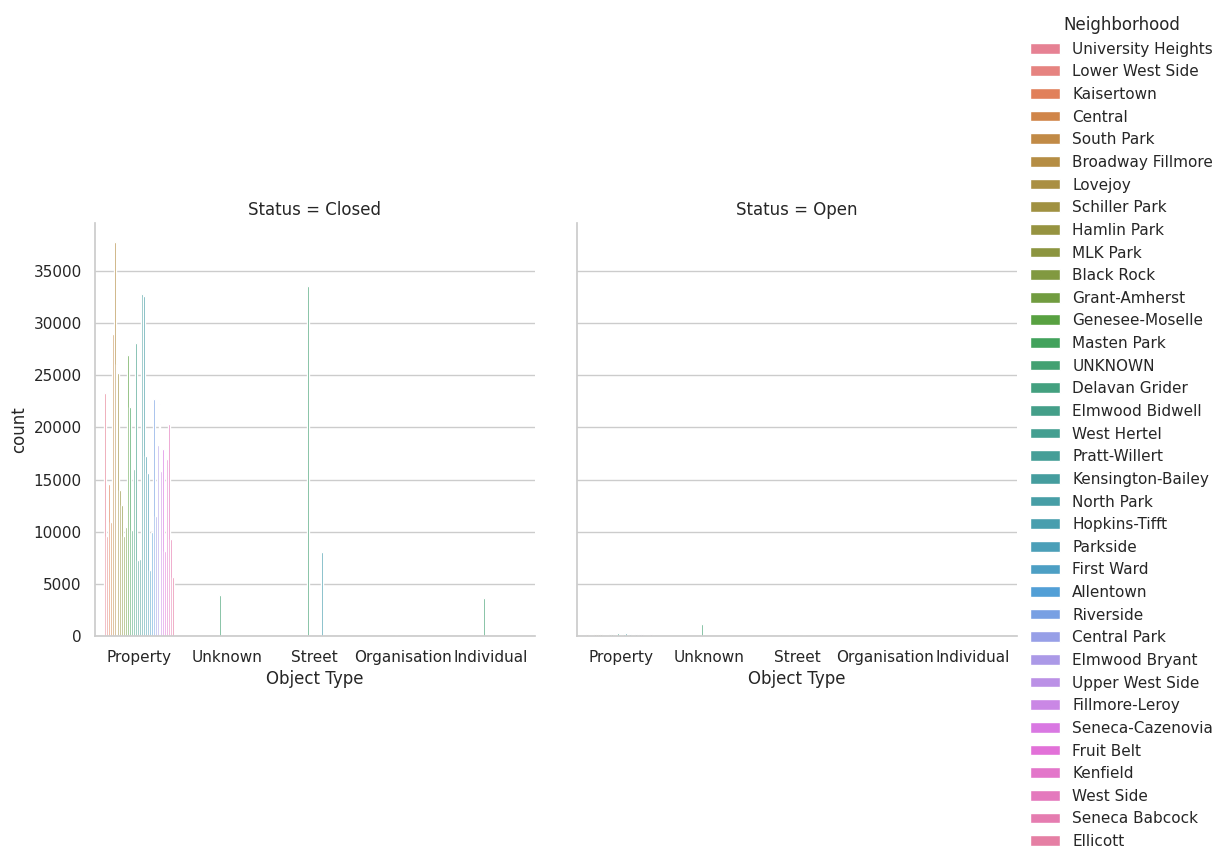

In [24]:
g = sns.catplot(x="Object Type", hue="Neighborhood", col="Status",
                data=df_311calls, kind="count");

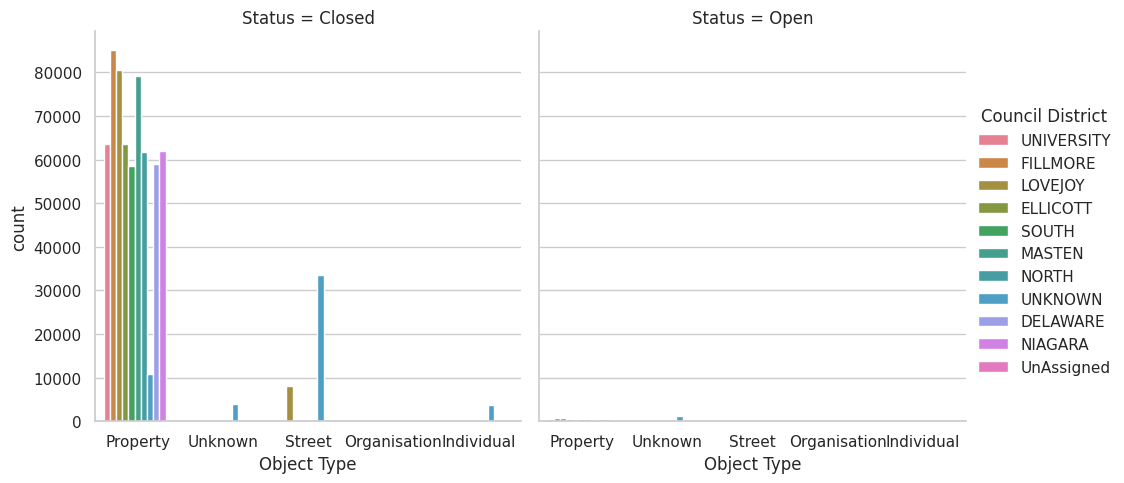

In [25]:
g = sns.catplot(x="Object Type", hue="Council District", col="Status",
                data=df_311calls, kind="count");

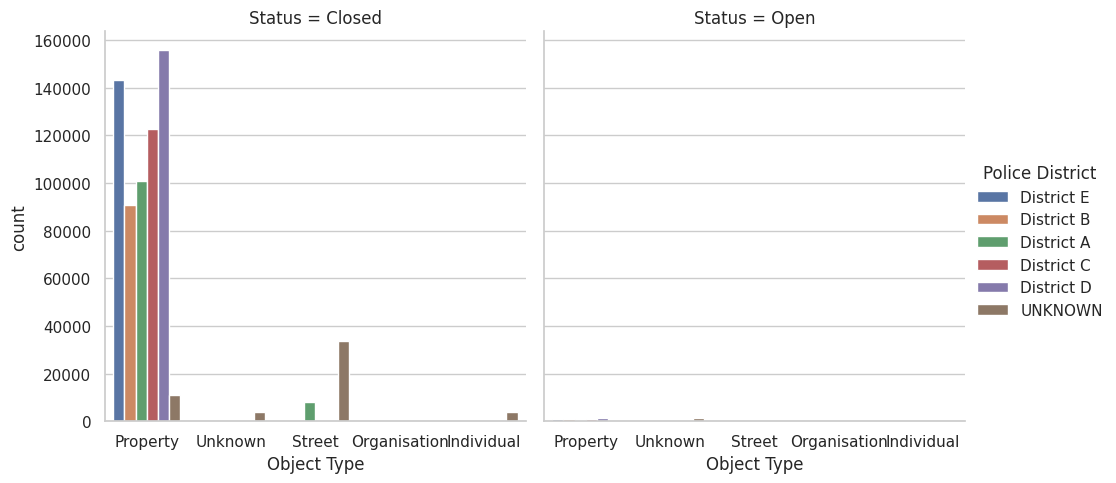

In [26]:
g = sns.catplot(x="Object Type", hue="Police District", col="Status",
                data=df_311calls, kind="count");

The overwhelming majority of 311 reports are done on property. The majority of the reports where the location is unknown defaults to Street.

# How the Categorical Variables are related to Months/Years

In [27]:
df_311calls['Open Date'] = pd.to_datetime(df_311calls['Open Date'])

In [28]:
df_311calls['Open Date Month'] = df_311calls['Open Date'].dt.month
df_311calls['Open Date Year'] = df_311calls['Open Date'].dt.year

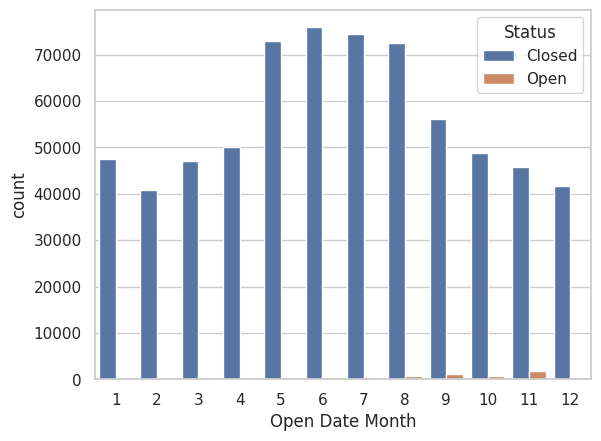

In [29]:
ax = sns.countplot(x="Open Date Month", hue="Status", data=df_311calls)

The majority of 311 reports occur over the Summer. This makes sense considering those months mean more general outdoor activity.

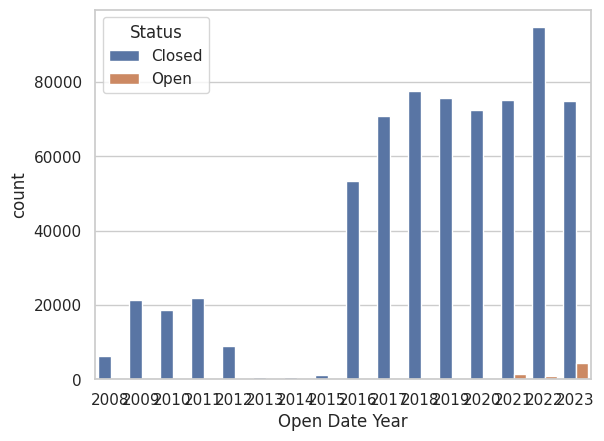

In [30]:
ax = sns.countplot(x="Open Date Year", hue="Status", data=df_311calls)

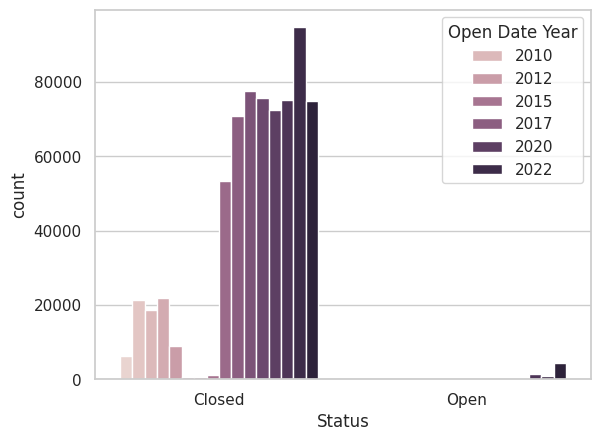

In [31]:
ax = sns.countplot(x="Status", hue="Open Date Year", data=df_311calls)

The vast majority of 311 reports occurred within the last 8 years. The number of reports from 2008 to 2015 are considerably less than the number of reports from 2016 to 2023.